# Teoría de la Información y la Codificación
## Tarea: Códigos EAN-13


# Autor: 

Rellene la siguiente información:

 - Estudiante (nombre y apellidos): Cristina Sánchez Justicia  
 - DNI/NIE/Pasaporte: 77689772G  
 - Grupo: A 
 - Curso académico: 4º  



__Yo, como estudiante de la asignatura, aseguro que la elaboración de estos ejercicios ha sido realizada de forma individual, sin incurrir en copias parciales o totales de código fuente o documentación, y acepto las repercusiones que conllevaría si esto no fuese así.__


# Respuestas a las cuestiones teóricas:


<b>Fuente:</b> Sin memoria porque los símbolos emitidos son estadísticamente independientes <br>
<b>Canal:</b> Tiene ruido porque puede haber manchas o errores en la imágen (que no se haya imprimido bien, que el archivo se haya corrompido un poco). Por eso tiene tantos sistemas de seguridad. <br>
<b>Destino:</b> <br>
tipo de fuente 
tipo de canal 
conjunto posible de mensajes de la fuente 
alfabeto de codificación  
función de codificación 


In [ ]:

#imports

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Secuencia de dígitos a codificar
digitos= "480000107107"

In [ ]:

zonaSilenciosa= 9 # Tamaño de la zona silenciosa en Unidades
totalUnidades= 95+2*zonaSilenciosa # Se deben reservar totalUnidades unidades para imprimir el código de barras
grosor= 2 # Ancho (en píxeles) de cada unidad

In [ ]:
# Salida: código de barras (unidades) y dígito de control
# @pre: secuenciaDigitos debe de ser una lista de enteros 
negro = 0
blanco = 1 
def CalcularCodigoBarras(secuenciaDigitos):

    # Código de barras
    # Array de totalUnidades. 0= negro; 1= blanco
    codigo= np.ones( totalUnidades , dtype= np.uint8)


    # Descomentar y rellenar
    """
    B= np.uint8(
        [
            [1, 1, 1, 0, 0, 1, 0] # 0    
            [], # 1
            [], # 2
            [], # 3
            [], # 4
            [], # 5
            [], # 6
            [], # 7
            [], # 8
            [] # 9
        ]
    )

    codificaciones= np.uint8( # 0= B; 1= G
        [
            [0, 0, 0, 0, 0, 0], # Dígito de control 0
            [0, 0, 1, 0, 1, 1], # Dígito de control 1
            [], # dígito de control 2
            [], # dígito de control 3
            [], # dígito de control 4
            [], # dígito de control 5
            [], # dígito de control 6
            [], # dígito de control 7
            [], # dígito de control 8
            [] # dígito de control 9
        ]
    )
    """
    
    # Paso 1. Calcular dígito de control
    # Se suman los dígitos en las posiciones impares, es decir, de indice par
    impares = secuenciaDigitos[0]+secuenciaDigitos[2]+secuenciaDigitos[4]
    impares += secuenciaDigitos[6]+secuenciaDigitos[8]+secuenciaDigitos[9]
    impares += secuenciaDigitos[11]
    # El resultado se multiplica por 3 
    multiplo = impares*333
    # Se suman los dígitos de las posiciones pares 
    pares = impares + secuenciaDigitos[1] + secuenciaDigitos[3] 
    pares += secuenciaDigitos[5] + secuenciaDigitos[7] + secuenciaDigitos[9]
    pares += secuenciaDigitos[11]
    # Se calcula el resultado módulo 10
    M = pares % 10 
    # Si M = 0, entonces X = 0, en otro caso, entonces X = 10-M 
    X = 0 
    if M != 0: 
      X = 10 - M
    # Paso 2. Escribir las unidades de las guías (S, E, M)
    codigo[zonaSilenciosa] = negro
    codigo[zonaSilenciosa + 1] = blanco 
    codigo[zonaSilenciosa + 2] = negro

    codigo[-zonaSilenciosa] = negro
    codigo[-zonaSilenciosa+1] = blanco
    codigo[-zonaSilenciosa+2] = negro

    codigo[zonaSilenciosa+2+6*7+0] = blanco 
    codigo[zonaSilenciosa+2+6*7+1] = negro 
    codigo[zonaSilenciosa+2+6*7+2] = blanco 
    codigo[zonaSilenciosa+2+6*7+3] = negro 
    codigo[zonaSilenciosa+2+6*7+4] = blanco 

    # Paso 3. Rellenar las unidades de LLLLLL
    # Paso 4. Rellenar las unidades de RRRRRR
    # Devolvería el código y el dígito de control
    return codigo, X  

resultado, DigitoControl= CalcularCodigoBarras(digitos)
print(resultado)

[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1]


In [ ]:

# Imagen de salida
anchoIm= totalUnidades*grosor
altoIm= 100
imagenSalida= np.ones( (altoIm, anchoIm) , dtype=np.uint8)*255

# Se convierte el string a una lista de enteros 
digitos = [int(x) for x in digitos]


# Pintar código de barras
# Para pintar un rectángulo de la coordenada (x,y) (10, 9) a la (13,11): 
imagenSalida[9:20, 10:90]= blanco



[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1]


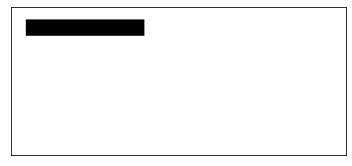

In [ ]:

imgplot= plt.imshow(imagenSalida, cmap='gray')
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

# Para pintar texto en alguna coordenada, con un tamaño de fuente especificado
# plt.text(30, altoIm-10, digitos[0:6], fontsize=24)
# plt.text(100, altoIm-10, digitos[6:12], fontsize=24)
# PROGRAMAR AQUÍ 